<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Python BootCamp </h1>
        <a href="https://masters.em-lyon.com/en/msc-in-digital-marketing-data-science">[Emlyon]</a> MSc in Digital Marketing & Data Science (DMDS) <br/>
         September 2022, Paris | © Saeed VARASTEH [RP] | Lucas VILLAIN
    </span>
</div>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#fff4e3;">
    <img src="images/homework.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#db9425">
        <h4 style="padding-top:25px;"> HOMEWORK 07 </h4>
    </span>
</div>

### Homework 07 - Marketing Campaign

---

The aim of this exercise is to evaluate your abilities for applying your theoretical knowledge to a practical case in the universe of online advertising.

<h4>Description of the dataset</h4>

The dataset __campaign.csv__ contains a full day of impressions for one particular mobile campaign. Each row corresponds to an impression. The characteristics of each impression are presented in columns and we are more particularly interested in the outcome of the impression: the occurrence of a click or the occurrence of a conversion following a click. The list of columns is classified below by topic:

unixtimestamp of impression <br/>
admantx <span style="color:gray">(external partner which indicate interests of given user)</span>  <br/>
exelate <span style="color:gray">(external partner which indicate interests of given user)</span>  <br/>
browserHeight / browserWidth / deviceHeight / deviceWidth / documentHeight / documentWidth last24hClicks / last24hClicksOnAdvertiser / ... <span style="color:gray">(historic interactions of given user with our inventory)</span> <br/>
browserLanguage / browserName / os <br/>
adSpaceId / adSpacePrimaryThematic <br/>
city <br/>
formatId / containerId / advertiserId / creativeId <br/>
deviceReferrer <br/>
click <br/>
conversion <br/>

__Your Task__

Read and clean the dataset (remove missing values, select relevant columns, and convert column types if necessary).

Explore data, create visualizations, and look for patterns. Try to find the relationship between the features and the occurrence of a click.

Use a statistical method that can identify the factors (features, columns) which seem to be the most influential for a click occurrence.

Comment/document everything.

In [1]:
# your code
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/campaign.csv")

In [3]:
df.head()

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,os,city,adSpacePrimaryThematic,deviceReferrer,formatId,containerId,advertiserId,creativeId,click,conversion
0,1493337601,41.837,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,iOS,Bourg-les-valence,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
1,1493337602,14.431,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,iOS,Joeuf,NEWS,other,111,8338,310,24595,0,0
2,1493337615,63.729,0.0,0.0,0.0,0.0,5.109,0.0,0.0,0.0,...,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
3,1493337703,43.345,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,iOS,Vigneux-sur-seine,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
4,1493337828,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,iOS,Barbey,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0


In [4]:
df.isna().sum()

timestamp                        0
admantx_art_and_entertainment    0
admantx_automotive               0
admantx_business                 0
admantx_careers                  0
                                ..
containerId                      0
advertiserId                     0
creativeId                       0
click                            0
conversion                       0
Length: 135, dtype: int64

In [5]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962973 entries, 0 to 962972
Data columns (total 135 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    timestamp                            int64  
 1    admantx_art_and_entertainment        float64
 2    admantx_automotive                   float64
 3    admantx_business                     float64
 4    admantx_careers                      float64
 5    admantx_education                    float64
 6    admantx_family_and_parenting         float64
 7    admantx_health_and_fitness           float64
 8    admantx_food_and_drink               float64
 9    admantx_hobbies_and_interests        float64
 10   admantx_home_and_garden              float64
 11   admantx_law_govt_and_politics        float64
 12   admantx_news                         float64
 13   admantx_finance                      float64
 14   admantx_society                      float64
 15   admantx_science

In [6]:
#changing the column name
df.rename(columns={'browserLangage': 'BrowserLanguage'},inplace=True)

#dropping columns that have 0 values
df.loc[:, (df != 0).any(axis=0)]
df

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,os,city,adSpacePrimaryThematic,deviceReferrer,formatId,containerId,advertiserId,creativeId,click,conversion
0,1493337601,41.837,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Bourg-les-valence,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
1,1493337602,14.431,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Joeuf,NEWS,other,111,8338,310,24595,0,0
2,1493337615,63.729,0.0,0.0,0.0,0.0,5.109,0.0,0.00,0.0,...,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
3,1493337703,43.345,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Vigneux-sur-seine,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
4,1493337828,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Barbey,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962968,1493423924,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Asnieres-sur-seine,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
962969,1493423933,43.152,0.0,0.0,0.0,0.0,0.000,0.0,12.96,0.0,...,iOS,Levallois-perret,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
962970,1493423966,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Levallois-perret,NEWS,other,111,8338,310,24595,0,0
962971,1493423974,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Athee-sur-cher,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0


In [7]:
#changing the timestamp to date time format
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

In [8]:
df['date'] = pd.to_datetime(df['datetime']).dt.date
df["time"] = pd.to_datetime(df["datetime"]).dt.time
df.drop(columns = ["timestamp", "datetime"], inplace =True)


df

,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,admantx_home_and_garden,...,adSpacePrimaryThematic,deviceReferrer,formatId,containerId,advertiserId,creativeId,click,conversion,date,time
0,41.837,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,...,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0,2017-04-28,00:00:01
1,14.431,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,...,NEWS,other,111,8338,310,24595,0,0,2017-04-28,00:00:02
2,63.729,0.0,0.0,0.0,0.0,5.109,0.0,0.00,0.0,0.0,...,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0,2017-04-28,00:00:15
3,43.345,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,...,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0,2017-04-28,00:01:43
4,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,...,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0,2017-04-28,00:03:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962968,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,...,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0,2017-04-28,23:58:44
962969,43.152,0.0,0.0,0.0,0.0,0.000,0.0,12.96,0.0,0.0,...,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0,2017-04-28,23:58:53
962970,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,...,NEWS,other,111,8338,310,24595,0,0,2017-04-28,23:59:26
962971,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,...,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0,2017-04-28,23:59:34


## User interaction basis time

In [9]:
df_time_clicks = df.groupby("time")[["click","conversion"]].sum().sort_values("click", ascending = False)

df_time_clicks.head(10)


,click,conversion
time,,
08:02:27,12,0
09:23:26,12,0
08:47:15,11,0
05:50:18,11,0
20:58:09,11,0
09:00:01,10,2
08:46:38,10,0
08:57:15,10,0
06:07:07,10,0



comments: 
Maximum clicks between 8:00 AM to 9:30 AM 

In [10]:
df_time_conversion = df_time_clicks.sort_values("conversion", ascending = False)
df_time_conversion.head(20)

#clicks leading to conversion: morning and night 

,click,conversion
time,,
09:38:32,6,2
08:51:18,5,2
06:42:50,2,2
05:52:03,2,2
07:33:25,2,2
06:52:12,6,2
06:54:05,4,2
07:23:58,4,2
21:55:09,5,2



comments: 
clicks leading to conversion: morning (before 10 AM) and night


## User interest

In [11]:
#impressions by user interest
interest = df.iloc[:, 0:23]
user_interest = interest.sum().sort_values(ascending = False).reset_index()

user_interest.rename(columns ={"index":"user_interest", 0:"impressions"}, inplace= True)
user_interest

,user_interest,impressions
0,admantx_art_and_entertainment,8840672.469
1,admantx_society,5924618.683
2,admantx_law_govt_and_politics,4188267.081
3,admantx_sports,3365151.896
4,admantx_technology_and_computing,2601937.762
5,admantx_travel,1884383.162
6,admantx_science,1701921.975
7,admantx_style_and_fashion,1111731.430
8,admantx_health_and_fitness,736548.260
9,admantx_food_and_drink,641843.206


[Text(0.5, 1.0, 'Impressions by User interest')]

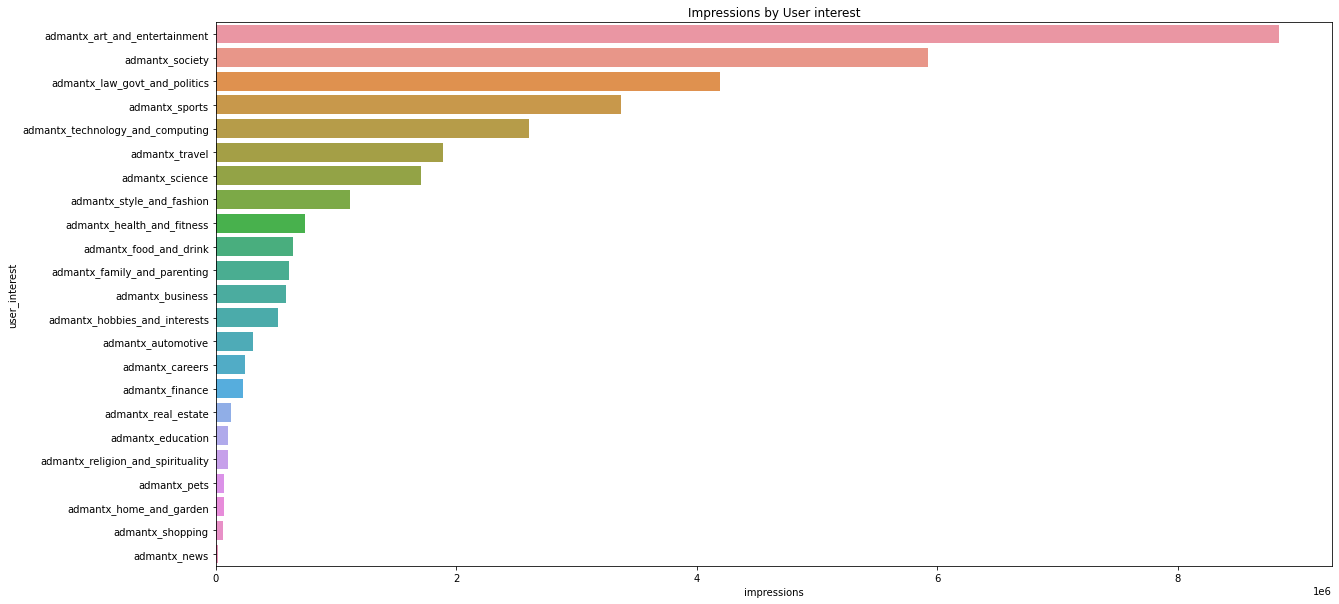

In [12]:
plt.figure(figsize=(20, 10))
sns.barplot(data = user_interest, x="impressions", y="user_interest").set(title = "Impressions by User interest")

comments:
Maximum impressions by users interested in Arts and Entertainment followed by society, government and politics

## User interaction basis city

In [13]:
#Impressions by city
df_imp = df["city"].value_counts().sort_values(ascending = False)
df_imp

Paris                  205328
Aubervilliers           44100
Orange                  33525
Toulouse                19579
Courbevoie              18340
                        ...  
Castelnau-durban            1
Juigne-des-moutiers         1
Baillolet                   1
Pitgam                      1
Fayet-ronaye                1
Name: city, Length: 5260, dtype: int64

comments: 
Maximum impressions in Paris

In [14]:
#Conversions by city
df.groupby("city")["conversion"].sum().sort_values(ascending = False).head(10)

city
Paris            138
Orange            82
Aubervilliers     56
Courbevoie        30
Latresne          22
Garches           19
Mions             13
Toulouse          11
Villeurbanne       5
Strasbourg         4
Name: conversion, dtype: int64

comments:
Maximum conversions in Paris

In [ ]:
#CTR and Conversion rate analysis

df_conv_city = df.pivot_table(index = "city", values = ["conversion","click"], aggfunc = sum).reset_index()
df_conv_city.sort_values("conversion", ascending =False, inplace= True)


In [ ]:
df_conv_city["conversion_rate"] = (df_conv_city["conversion"]/df_conv_city["click"])*100 

df_conv_city

<AxesSubplot:xlabel='city'>

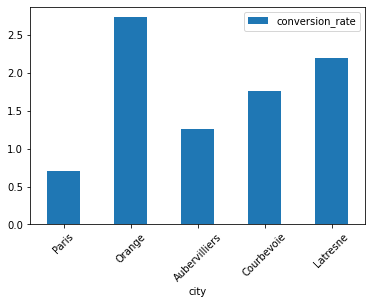

In [17]:
df_conv_city.drop(columns = ["click", "conversion"]).iloc[0:5,:].plot(kind = "bar", rot=45)

observations:
However higher conversion rate in Orange

In [18]:
#adding impressions to find CTR in the above DF

df_click_city = df_conv_city.assign(impressions = df_imp)

df_click_city["CTR"] = (df_click_city["click"]/df_click_city["impressions"])*100

df_click_city.dropna(inplace = True)

df_click_city

,click,conversion,conversion_rate,impressions,CTR
city,,,,,
Paris,19643,138,0.702540,205328,9.566645
Orange,2999,82,2.734245,33525,8.945563
Aubervilliers,4422,56,1.266395,44100,10.027211
Courbevoie,1709,30,1.755413,18340,9.318430
Latresne,1001,22,2.197802,10566,9.473784
...,...,...,...,...,...
Brettes,2,0,0.000000,42,4.761905
Bretten,2,0,0.000000,27,7.407407
Brette-les-pins,7,0,0.000000,46,15.217391


## Browser and Language preferred

In [19]:
#language most used
df["BrowserLanguage"].value_counts()


fr       951888
en         8975
other       557
es          497
it          310
pt          281
tr          183
de          116
nl           77
ar           53
pl           36
Name: BrowserLanguage, dtype: int64

comments: 
most preferred language is French 

In [20]:
#browsers used 
df_b = df["browserName"].value_counts()
df_b

Facebook         479405
Mobile Safari    434412
other             49156
Name: browserName, dtype: int64

<AxesSubplot:title={'center':'Browsers used'}>

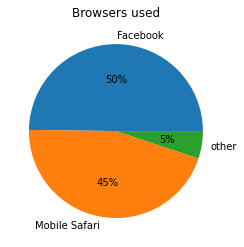

In [21]:
df_b.plot.pie(title = "Browsers used", autopct='%1.0f%%', ylabel = "")


comments:
Most used browser - Facebook

In [22]:
#Relation between conversion, browser and browser language used

df_conv_by_browser =df.pivot_table(index= "browserName", columns = "BrowserLanguage", values= "conversion", aggfunc= sum)


In [23]:
df_conv_by_browser


BrowserLanguage,ar,de,en,es,fr,it,nl,other,pl,pt,tr
browserName,,,,,,,,,,,
Facebook,0.0,0.0,1.0,0.0,192.0,0.0,0.0,1.0,0.0,0.0,0.0
Mobile Safari,0.0,0.0,1.0,0.0,199.0,0.0,0.0,0.0,0.0,0.0,0.0
other,0.0,0.0,2.0,0.0,21.0,0.0,0.0,0.0,NaN,0.0,0.0


comments:
Most conversions on Mobile Safari in french language

## AdSpace analysis

In [24]:
#impressions on different ad spaces

df["adSpacePrimaryThematic"].value_counts()

ART_AND_ENTERTAINMENT       483981
NEWS                        234056
SOCIETY                      55261
STYLE_AND_FASHION            43975
SPORTS                       43530
NONE                         37070
TECHNOLOGY_AND_COMPUTING     21306
BUSINESS                     16469
FAMILY_AND_PARENTING         13835
EDUCATION                     4110
REAL_ESTATE                   3844
CAREERS                       2465
HEALTH_AND_FITNESS            1170
AUTOMOTIVE                     729
HOME_AND_GARDEN                647
FOOD_AND_DRINK                 466
FINANCE                         31
HOBBIES_AND_INTERESTS           28
Name: adSpacePrimaryThematic, dtype: int64

comments:
Maximum impressions on ad spaces related to art and entertainment

In [25]:
#analysing the CTR and Conversion rate

df1 = df.pivot_table(index = "adSpacePrimaryThematic", values = ["last30dImpressions", "last30dClicks", "conversion"], aggfunc =sum, fill_value=0)
df1

,conversion,last30dClicks,last30dImpressions
adSpacePrimaryThematic,,,
ART_AND_ENTERTAINMENT,198,7711,84545
AUTOMOTIVE,2,1,23
BUSINESS,8,87,1995
CAREERS,1,31,395
EDUCATION,2,31,518
FAMILY_AND_PARENTING,6,72,712
FINANCE,0,0,1
FOOD_AND_DRINK,0,9,29
HEALTH_AND_FITNESS,1,5,107


In [26]:
df1["CTR"] = (df1["last30dClicks"]/df1["last30dImpressions"])*100

In [27]:
df1["Conversion_rate"] = (df1["conversion"]/df1["last30dClicks"])*100 
df1

,conversion,last30dClicks,last30dImpressions,CTR,Conversion_rate
adSpacePrimaryThematic,,,,,
ART_AND_ENTERTAINMENT,198,7711,84545,9.120587,2.567760
AUTOMOTIVE,2,1,23,4.347826,200.000000
BUSINESS,8,87,1995,4.360902,9.195402
CAREERS,1,31,395,7.848101,3.225806
EDUCATION,2,31,518,5.984556,6.451613
FAMILY_AND_PARENTING,6,72,712,10.112360,8.333333
FINANCE,0,0,1,0.000000,NaN
FOOD_AND_DRINK,0,9,29,31.034483,0.000000
HEALTH_AND_FITNESS,1,5,107,4.672897,20.000000


In [28]:
#dropping columns that have null values

df1.drop(["FINANCE", "AUTOMOTIVE", "HOBBIES_AND_INTERESTS"], axis=0, inplace=True)


In [29]:
plot_data = df1.loc[:,["CTR", "Conversion_rate"]]

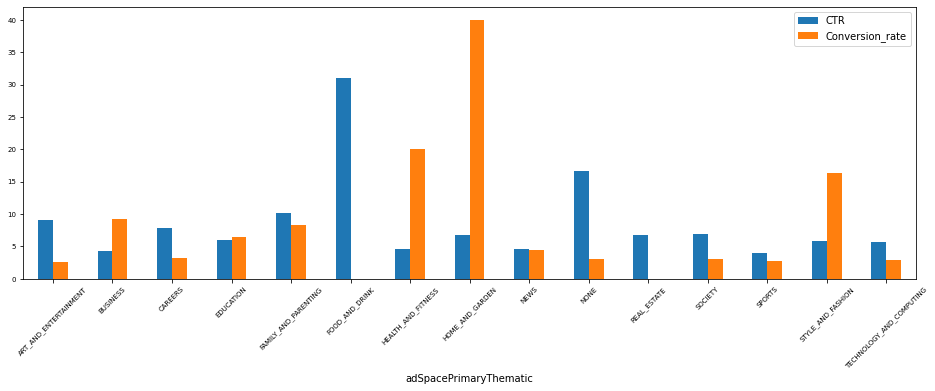

In [30]:
ax = plot_data.plot(
    kind='bar', rot=45, fontsize=7,
    figsize=(16, 5))

Comments:
Highest conversion rate on home and garden ad space though CTR low. CTR high on food and drink sites but no conversion.


In [31]:
#taking the columns - user interest, click and conversion
df_c = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12,13,14,17,18,19,21,123,125,132,133]]


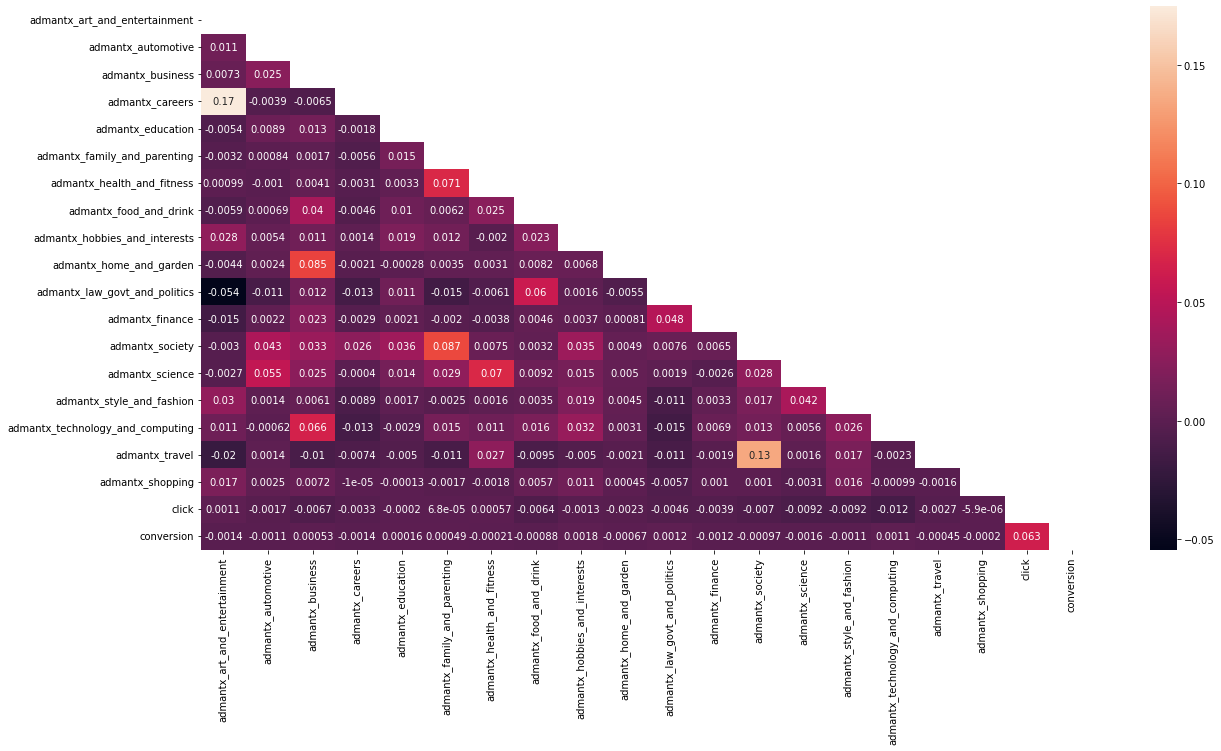

In [32]:
#finding the correlation

plt.figure(figsize=(20, 10))
corr = df_c.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True, mask = matrix)


comments:
1) User interested in society also show interest in travel and family/parenting
2) User interested in science also show interest in health and fitness
3) High correlation between users interested in careers and arts/entertainment


Observations: 

  Audience : 
     major interest of the audiences is arts and entertainment 
the ads are also majorly shown on the spaces related to the above category, however the maximum conversion is generated from ad spaces in home and garden. Hence ads displayed in arts and entertainment needs to be optimised

Also CTR high on food and drink ad spaces with no conversion, the budget can be allocated to other spaces generating conversion




